# Genetic Algorithm (GA)
<left><img src="https://www.researchgate.net/profile/Zheng_Sheng/publication/261369473/figure/fig2/AS:614156092837889@1523437631120/The-graphical-procedure-of-the-ACS-GA-algorithm.png" />

# Core Functions

In [1]:
import sys
import time
import math
import random
import itertools
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation
import copy


# generate init city sequence
def initCitySequence(cities_number, dic):
    sequence = []
    while len(sequence) < cities_number:
        random_number = random.randint(1, cities_number)
        if random_number not in sequence:
            sequence.append(random_number)
    distance = evalu(sequence, dic)
    citices_path_data = {"sequence":sequence, "distance":distance}
    return citices_path_data


def GeneticAlgorithm(cities_paths_list, crossover_number, mutation_probability, dic):
    cities_paths_number = len(cities_paths_list)
    
    for i in range(int(cities_paths_number/2)):
         # 隨機從基因庫選出用來交配的基因
        first_cities_path = random.randint(0, cities_paths_number - 1)
        second_cities_path = random.randint(1, cities_paths_number - 1)
        while(first_cities_path == second_cities_path):
            second_cities_path = random.randint(0, cities_paths_number - 1)

        # 交配 (crossover)，交被出來的新基因會加入到基因庫中
        crossover_result = crossover(cities_paths_list[first_cities_path], cities_paths_list[second_cities_path], crossover_number, dic)
        cities_paths_list.extend(crossover_result)

        # 突變 (mutation)，交配的基因有機率突變
        r = random.random()
        if r < mutation_probability:
            mutation_cities_paths = mutation(cities_paths_list[first_cities_path], dic)
            cities_paths_list.append(mutation_cities_paths)
        r = random.random()
        if r < mutation_probability:
            mutation_cities_paths = mutation(cities_paths_list[second_cities_path], dic)
            cities_paths_list.append(mutation_cities_paths)
        
    # 重新排序基因庫
    cities_paths_list = sorted(cities_paths_list, key=lambda k: k['distance'], reverse=False)
    cities_paths_list = cities_paths_list[:cities_paths_number]
    return cities_paths_list


def crossover(first_cities_path, second_cities_path, crossover_number, dic):
    citices_number = len(first_cities_path['sequence'])
    first_crossover = copy.deepcopy(first_cities_path)
    second_crossover = copy.deepcopy(second_cities_path)
    
    random_postion = random.randint(0, citices_number - crossover_number)
    temp = first_crossover['sequence'][random_postion:random_postion+crossover_number]
    first_crossover['sequence'][random_postion:random_postion+crossover_number] = second_crossover['sequence'][random_postion:random_postion+crossover_number]
    second_crossover['sequence'][random_postion:random_postion+crossover_number] = temp
    
    first_repeat_position = []
    second_repeat_position = []
    first_count = []
    second_count = []
    for i , city in enumerate(first_crossover['sequence']):
        if city not in first_count:
            first_count.append(city)
        else:
            first_repeat_position.append(i)
    for i , city in enumerate(second_crossover['sequence']):
        if city not in second_count:
            second_count.append(city)
        else:
            second_repeat_position.append(i)
            
    if len(first_repeat_position) == len(second_repeat_position):
        for i in range(len(first_repeat_position)):
            temp = first_crossover['sequence'][first_repeat_position[i]]
            first_crossover['sequence'][first_repeat_position[i]] = second_crossover['sequence'][second_repeat_position[i]]
            second_crossover['sequence'][second_repeat_position[i]] = temp
    else:
        print("Error, length of first_repeat_position not equal length of second_repeat_position!")
    
    
    first_crossover['distance'] = evalu(first_crossover['sequence'], dic)
    second_crossover['distance'] = evalu(second_crossover['sequence'], dic)
    result = [first_crossover, second_crossover]
    return result

def mutation(cities_paths, dic):
    mutation_cities_paths = copy.deepcopy(cities_paths)
    cities_number = len(mutation_cities_paths['sequence'])
    first_position = random.randint(0,  cities_number-1)
    second_position = random.randint(0, cities_number-1)
    while(first_position == second_position):
        second_position = random.randint(0, cities_number-1)
    temp = mutation_cities_paths['sequence'][first_position]
    mutation_cities_paths['sequence'][first_position] = mutation_cities_paths['sequence'][second_position]
    mutation_cities_paths['sequence'][second_position] = temp
    mutation_cities_paths['distance'] = evalu(mutation_cities_paths['sequence'], dic)
    return mutation_cities_paths


def createRandomCombination(origin_sequence, swap_number):
    combination_list = []
    swap_list = getRandomSquence(swap_number, len(origin_sequence))
    permutations = list(itertools.permutations(swap_list, len(swap_list)))
    for seq in permutations:
        temp_seq = origin_sequence.copy()
        for index, element in enumerate(swap_list):
            temp_seq[element] = origin_sequence[seq[index]]
        combination_list.append(temp_seq)
    return combination_list
    

# accorting to the citices sequence, return the distance
def evalu(seq, dic):
    dist = 0
    seq_length = len(seq)
    for i in range(seq_length):
        d = [dic[seq[i]][0]-dic[seq[(i+1)%seq_length]][0], dic[seq[i]][1]-dic[seq[(i+1)%seq_length]][1]]
        dist += distance(d)
    return dist

def distance(axis):
    return math.sqrt(axis[0]*axis[0]+axis[1]*axis[1])

def getPath(cities_seq, dic):
    x = []
    y = []
    for city in cities_seq:
        x.append(dic[city][0])
        y.append(dic[city][1])
    return x, y
    

# read the 51 cities file
def readfile(file_name):
    dic = {}
    with open(file_name) as f:
        r = f.read()
        read_line = r.split('\n')               
        for i in range(len(read_line)):         
            read_element = read_line[i].split()
            dic[int(read_element[0])] = [int(read_element[1])]
            dic[int(read_element[0])].append(int(read_element[2]))
        f.close()
    return dic

# Step 2: Main Function

Please enter the iteration number: 50000


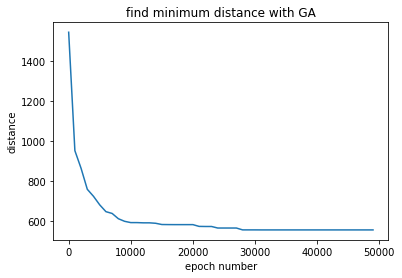

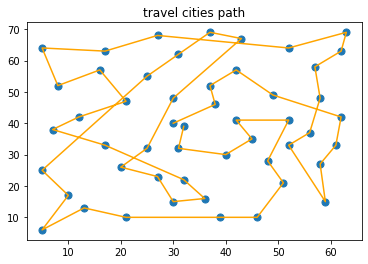


Final sequence: [46, 12, 5, 38, 11, 16, 49, 10, 33, 45, 42, 19, 40, 41, 13, 48, 8, 31, 28, 27, 47, 4, 17, 44, 15, 37, 18, 25, 14, 6, 23, 24, 43, 7, 26, 3, 36, 35, 20, 29, 50, 9, 39, 30, 34, 21, 2, 22, 1, 32, 51]
Final distance: 554.9601068444402


In [5]:
#initial
cities_number = 51 # 有幾座城市
paths_number = 4 # 基因庫的數量
crossover_number = 4 # 交配時交換的數量
mutation_probability = 0.05 # 突變機率，介於 0.0 ~ 1.0

dic = readfile('eil51.txt') # 讀取城市資料

# 初始基因庫裡的城市排序
cities_paths_list = []
for i in range(paths_number):
    temp = initCitySequence(cities_number, dic)
    cities_paths_list.append(temp)

# 排序基因庫
cities_paths_list = sorted(cities_paths_list, key=lambda k: k['distance'], reverse=False)

iter_num = input('Please enter the iteration number:')
iter_num = int(iter_num)

iterations_per_frame = 1000

history_epcho_list = []
history_sequence_list = []
history_distance_list = []

for i in range(iter_num):
    cities_paths_list = GeneticAlgorithm(cities_paths_list, crossover_number, mutation_probability, dic)
    if i % iterations_per_frame == 0:
        history_epcho_list.append(i)
        history_sequence_list.append(cities_paths_list[0]["sequence"])
        history_distance_list.append(cities_paths_list[0]["distance"])

#Output
plt.xlabel('epoch number')
plt.ylabel('distance')
plt.title('find minimum distance with GA')
plt.plot(history_epcho_list, history_distance_list)


plt.figure()
plt.title('travel cities path')
x, y = getPath(cities_paths_list[0]["sequence"], dic) 
plt.scatter(x, y, s=50)
plt.plot(x, y, 'orange')

plt.show()

print('\nFinal sequence:',cities_paths_list[0]["sequence"])
print('Final distance:',cities_paths_list[0]["distance"])

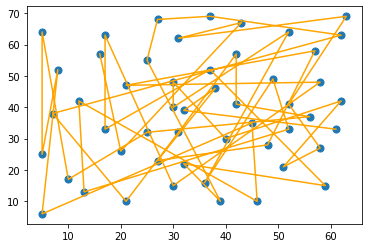

In [6]:
# animation
fig, ax = plt.subplots()
plt.scatter(x, y, s=50)
line, =ax.plot(x, y, 'orange')

def animate(i):
    x, y = getPath(history_sequence_list[i], dic) 
    line.set_data(x, y)
    return line,
    
ani = matplotlib.animation.FuncAnimation(fig, func=animate, interval=200, frames=len(history_epcho_list),blit=False, repeat=False)

from IPython.display import HTML
HTML(ani.to_jshtml())